# ANALIZA WYNIKÓW X PÓŁMARATONU GLIWICKIEGO

Dane pochodzą ze strony b4sport.pl, są dostępne pod adresem [Link do wyników](https://wyniki.b4sport.pl/x-polmaraton-gliwicki/e5830.html)

## Importowanie bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import polars as pl


## Wczytanie danych i wizualizacja struktury

In [2]:
data_pd=pd.read_html("https://wyniki.b4sport.pl/x-polmaraton-gliwicki/e5830.html")

In [3]:
print(len(data_pd))


3


In [4]:
data = pl.from_pandas(data_pd[2])

In [5]:
data.shape

(763, 17)

In [6]:
data.dtypes

[String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String]

In [7]:
data.columns

['Msc',
 'Zawodnik',
 'Numer',
 'Klub',
 'Miejscowość',
 'Kraj',
 'Kategoria',
 'Mkat',
 'K/M',
 'Czas startu',
 '10km',
 '16.097km',
 'Czas netto 21.097km',
 'Czas brutto 21.097km',
 'Różnica w czasie',
 'Tempo min/km',
 'Tempo km/h']

In [8]:
data.head(10)

Msc,Zawodnik,Numer,Klub,Miejscowość,Kraj,Kategoria,Mkat,K/M,Czas startu,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Różnica w czasie,Tempo min/km,Tempo km/h
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1""","""DĄBROWSKI Przemysław""","""2737""","""DĄBROWSKI TEAM""","""SIECHNICE""",null,"""M-30""","""1""","""M 1""","""00:00:03""","""00:33:51""","""00:54:35""","""01:12:14.88""","""01:12:17.97""",null,"""3:25""","""17.5 (100%)"""
"""2""","""GRZEGORZYCA Marcin""","""2171""",null,"""GIERAŁTOWICE""",null,"""M-40""","""1""","""M 2""","""00:00:03""","""00:34:43""","""00:55:58""","""01:13:28.67""","""01:13:32.49""","""+00:01:13 (1.7%)""","""3:28""","""17.2 (98.3%)"""
"""3""","""PIELA Stanisław""","""2475""","""MKL CIĘCINA""","""CIĘCINA""",null,"""M-30""","""2""","""M 3""","""00:00:03""","""00:34:41""","""00:55:58""","""01:13:30.52""","""01:13:33.95""","""+00:01:15 (1.7%)""","""3:29""","""17.2 (98.3%)"""
"""4""","""KOŻDOŃ Jarek""","""2834""","""TL ROW RYBNIK""","""ŻORY""",null,"""M-40""","""2""","""M 4""","""00:00:04""","""00:34:54""","""00:56:06""","""01:13:33.43""","""01:13:37.44""","""+00:01:18 (1.8%)""","""3:29""","""17.2 (98.3%)"""
"""5""","""TESLUK Kuba""","""2626""","""AW - SZYBCIEJ - TEAM""","""ŻORY""",null,"""M-30""","""3""","""M 5""","""00:00:03""","""00:34:43""","""00:56:01""","""01:13:37.37""","""01:13:41.02""","""+00:01:22 (1.9%)""","""3:29""","""17.2 (98.3%)"""
"""6""","""STEFAŃSKI Dawid""","""2585""",null,"""WROCŁAW""",null,"""M-30""","""4""","""M 6""","""00:00:03""","""00:34:43""","""00:55:59""","""01:13:43.64""","""01:13:47.11""","""+00:01:28 (2.0%)""","""3:29""","""17.2 (98.3%)"""
"""7""","""ŻANDARSKI Alan""","""2729""","""DYCZUŚ TEAM""","""POLSKA CEREKIEW""",null,"""M-30""","""5""","""M 7""","""00:00:00""","""00:35:34""","""00:56:51""","""01:14:47.15""","""01:14:47.36""","""+00:02:32 (3.4%)""","""3:32""","""16.9 (96.6%)"""
"""8""","""WOLNIK Mateusz""","""2689""","""-""","""LYSKI""",null,"""M-30""","""6""","""M 8""","""00:00:02""","""00:35:15""","""00:57:05""","""01:15:39.07""","""01:15:42.07""","""+00:03:24 (4.5%)""","""3:35""","""16.7 (95.4%)"""


## obróbka danych

In [9]:
data=data.drop("Kraj","Różnica w czasie","Mkat","Czas startu")


In [10]:
data=data.filter(pl.col("Msc") !="Przekroczony limit czasu: 03:00:00" )

In [11]:
data=data.filter(pl.col("Msc") !="null" )

In [12]:
data=data.filter(pl.col("Msc") !="Niesklasyfikowani" )

In [13]:
data.head(11)

Msc,Zawodnik,Numer,Klub,Miejscowość,Kategoria,K/M,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Tempo min/km,Tempo km/h
str,str,str,str,str,str,str,str,str,str,str,str,str
"""1""","""DĄBROWSKI Przemysław""","""2737""","""DĄBROWSKI TEAM""","""SIECHNICE""","""M-30""","""M 1""","""00:33:51""","""00:54:35""","""01:12:14.88""","""01:12:17.97""","""3:25""","""17.5 (100%)"""
"""2""","""GRZEGORZYCA Marcin""","""2171""",null,"""GIERAŁTOWICE""","""M-40""","""M 2""","""00:34:43""","""00:55:58""","""01:13:28.67""","""01:13:32.49""","""3:28""","""17.2 (98.3%)"""
"""3""","""PIELA Stanisław""","""2475""","""MKL CIĘCINA""","""CIĘCINA""","""M-30""","""M 3""","""00:34:41""","""00:55:58""","""01:13:30.52""","""01:13:33.95""","""3:29""","""17.2 (98.3%)"""
"""4""","""KOŻDOŃ Jarek""","""2834""","""TL ROW RYBNIK""","""ŻORY""","""M-40""","""M 4""","""00:34:54""","""00:56:06""","""01:13:33.43""","""01:13:37.44""","""3:29""","""17.2 (98.3%)"""
"""5""","""TESLUK Kuba""","""2626""","""AW - SZYBCIEJ - TEAM""","""ŻORY""","""M-30""","""M 5""","""00:34:43""","""00:56:01""","""01:13:37.37""","""01:13:41.02""","""3:29""","""17.2 (98.3%)"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""7""","""ŻANDARSKI Alan""","""2729""","""DYCZUŚ TEAM""","""POLSKA CEREKIEW""","""M-30""","""M 7""","""00:35:34""","""00:56:51""","""01:14:47.15""","""01:14:47.36""","""3:32""","""16.9 (96.6%)"""
"""8""","""WOLNIK Mateusz""","""2689""","""-""","""LYSKI""","""M-30""","""M 8""","""00:35:15""","""00:57:05""","""01:15:39.07""","""01:15:42.07""","""3:35""","""16.7 (95.4%)"""
"""9""","""NOWAK Andrzej""","""2426""","""NOWAK-TEAM""","""SOSNOWIEC""","""M-40""","""M 9""","""00:36:02""","""00:57:50""","""01:15:58.18""","""01:16:01.33""","""3:36""","""16.7 (95.4%)"""


**zamiana formatu czasu**

In [14]:
def time_to_minutes(time_str):
    if "." in time_str:
        time_str, fractional = time_str.split(".")
        fractional = float(f"0.{fractional}")
    else:
        fractional = 0.0

    parts = list(map(int, time_str.split(":")))
    hours = parts[0] if len(parts) == 3 else 0
    minutes, seconds = parts[-2], parts[-1]

    return hours * 60 + minutes + (seconds + fractional) / 60


In [15]:
def pace_to_minutes(pace_str):
    # Rozdzielenie minut i sekund
    if ":" in pace_str:
        minutes, seconds = map(float, pace_str.split(":"))
    return minutes + seconds / 60


**początkowo wszystkie zmienne były typu string, teraz przekształcamy je na inne**

In [16]:
data = data.with_columns([
 
 pl.col("10km").map_elements(time_to_minutes, return_dtype=pl.Float64).alias("10km"),
    pl.col("16.097km").map_elements(time_to_minutes, return_dtype=pl.Float64).alias("16.097km"),
    pl.col("Czas netto 21.097km").map_elements(time_to_minutes, return_dtype=pl.Float64).alias("Czas netto 21.097km"),
    pl.col("Czas brutto 21.097km").map_elements(time_to_minutes, return_dtype=pl.Float64).alias("Czas brutto 21.097km"),
    pl.col("Tempo min/km").map_elements(pace_to_minutes, return_dtype=pl.Float64).alias("Tempo min/km"),
    pl.col("Msc").cast(pl.Int32).alias("Msc"),
    pl.col("Numer").cast(pl.Int32).alias("Numer"),
    pl.col("Tempo km/h")
    .str.extract(r"(\d+(\.\d+)?)")  # Wyszukujemy zarówno liczby całkowite, jak i zmiennoprzecinkowe
    .cast(pl.Float64)
    .alias("Tempo km/h"),
])

In [17]:
data

Msc,Zawodnik,Numer,Klub,Miejscowość,Kategoria,K/M,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Tempo min/km,Tempo km/h
i32,str,i32,str,str,str,str,f64,f64,f64,f64,f64,f64
1,"""DĄBROWSKI Przemysław""",2737,"""DĄBROWSKI TEAM""","""SIECHNICE""","""M-30""","""M 1""",33.85,54.583333,72.248,72.2995,3.416667,17.5
2,"""GRZEGORZYCA Marcin""",2171,null,"""GIERAŁTOWICE""","""M-40""","""M 2""",34.716667,55.966667,73.477833,73.5415,3.466667,17.2
3,"""PIELA Stanisław""",2475,"""MKL CIĘCINA""","""CIĘCINA""","""M-30""","""M 3""",34.683333,55.966667,73.508667,73.565833,3.483333,17.2
4,"""KOŻDOŃ Jarek""",2834,"""TL ROW RYBNIK""","""ŻORY""","""M-40""","""M 4""",34.9,56.1,73.557167,73.624,3.483333,17.2
5,"""TESLUK Kuba""",2626,"""AW - SZYBCIEJ - TEAM""","""ŻORY""","""M-30""","""M 5""",34.716667,56.016667,73.622833,73.683667,3.483333,17.2
…,…,…,…,…,…,…,…,…,…,…,…,…
755,"""RUTKA Wiola""",2534,null,"""GLIWICE""","""K-40""","""K 174""",85.483333,142.9,191.160833,192.432833,9.05,6.6
756,"""PILARSKI Arkadiusz""",2482,null,"""GLIWICE""","""M-30""","""M 582""",85.466667,142.9,191.162,192.432833,9.05,6.6
757,"""PINIŁO Wojciech""",2826,"""PRYWATNY BIEG SZACHTA 2024R""","""GLIWICE""","""M-60""","""M 583""",87.883333,145.433333,194.578667,194.637167,9.216667,6.5


## Analiza danych

**podział danych na ze względu na płeć**

In [18]:
women_data = data.filter(pl.col("K/M").str.contains("K"))

In [19]:
men_data= data.filter(pl.col("K/M").str.contains("M"))

Ilość mężczyzn: 585
Liczba kobiet: 174


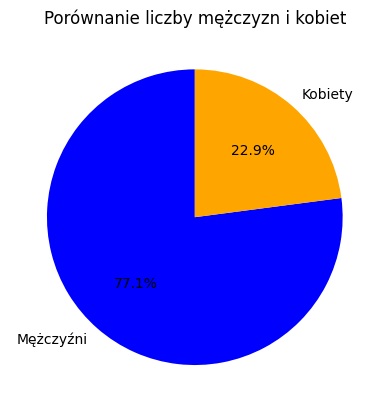

In [20]:
men_count = men_data.shape[0]
women_count = women_data.shape[0]

labels = ['Mężczyźni', 'Kobiety']
counts = [men_count, women_count]

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Porównanie liczby mężczyzn i kobiet')

print(f"Ilość mężczyzn: {men_count}")
print(f"Liczba kobiet: {women_count}")

plt.show()


**najszybsi zawodnicy ogółem**

In [21]:
top_10=data.head(10)

In [22]:
top_10

Msc,Zawodnik,Numer,Klub,Miejscowość,Kategoria,K/M,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Tempo min/km,Tempo km/h
i32,str,i32,str,str,str,str,f64,f64,f64,f64,f64,f64
1,"""DĄBROWSKI Przemysław""",2737,"""DĄBROWSKI TEAM""","""SIECHNICE""","""M-30""","""M 1""",33.85,54.583333,72.248,72.2995,3.416667,17.5
2,"""GRZEGORZYCA Marcin""",2171,null,"""GIERAŁTOWICE""","""M-40""","""M 2""",34.716667,55.966667,73.477833,73.5415,3.466667,17.2
3,"""PIELA Stanisław""",2475,"""MKL CIĘCINA""","""CIĘCINA""","""M-30""","""M 3""",34.683333,55.966667,73.508667,73.565833,3.483333,17.2
4,"""KOŻDOŃ Jarek""",2834,"""TL ROW RYBNIK""","""ŻORY""","""M-40""","""M 4""",34.9,56.1,73.557167,73.624,3.483333,17.2
5,"""TESLUK Kuba""",2626,"""AW - SZYBCIEJ - TEAM""","""ŻORY""","""M-30""","""M 5""",34.716667,56.016667,73.622833,73.683667,3.483333,17.2
6,"""STEFAŃSKI Dawid""",2585,null,"""WROCŁAW""","""M-30""","""M 6""",34.716667,55.983333,73.727333,73.785167,3.483333,17.2
7,"""ŻANDARSKI Alan""",2729,"""DYCZUŚ TEAM""","""POLSKA CEREKIEW""","""M-30""","""M 7""",35.566667,56.85,74.785833,74.789333,3.533333,16.9
8,"""WOLNIK Mateusz""",2689,"""-""","""LYSKI""","""M-30""","""M 8""",35.25,57.083333,75.651167,75.701167,3.583333,16.7
9,"""NOWAK Andrzej""",2426,"""NOWAK-TEAM""","""SOSNOWIEC""","""M-40""","""M 9""",36.033333,57.833333,75.969667,76.022167,3.6,16.7


**najszybsze kobiety**

In [23]:
women_data.head(10)

Msc,Zawodnik,Numer,Klub,Miejscowość,Kategoria,K/M,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Tempo min/km,Tempo km/h
i32,str,i32,str,str,str,str,f64,f64,f64,f64,f64,f64
23,"""TULEJA Aleksandra""",2640,"""LIGOTA TEAM""","""KATOWICE""","""K-30""","""K 1""",41.066667,66.016667,86.599833,86.721667,4.1,14.6
25,"""BROL Dominika""",2058,null,"""SIEMIANOWICE""","""K-30""","""K 2""",41.35,66.333333,87.088,87.223667,4.116667,14.5
43,"""SZEWCZYK Urszula""",2793,"""AUGUSTEAM""","""KATOWICE""","""K-50""","""K 3""",42.35,68.283333,89.985833,90.094833,4.25,14.1
100,"""BRANDSTÄTTER Grazyna""",2057,"""TRIRUN LINZ""","""LINZ""","""K-40""","""K 4""",46.666667,74.266667,97.606,97.764333,4.616667,13.0
101,"""MUSIALIK Magdalena""",2409,"""RZESZOWSKIE GAZELE I GEPARDY""","""RZESZÓW""","""K-40""","""K 5""",46.133333,74.116667,97.7285,97.964833,4.616667,13.0
133,"""DĄBROWSKA Julia""",2782,null,"""ŁAŃCE""","""K-20""","""K 6""",46.716667,75.616667,99.924833,100.504833,4.733333,12.7
141,"""STANEK Katarzyna""",2579,null,"""TARNOWSKIE GÓRY""","""K-20""","""K 7""",47.9,76.633333,100.374,100.9505,4.75,12.6
147,"""WIGLUSZ Katarzyna""",2810,null,"""NARAMA""","""K-30""","""K 8""",48.616667,77.233333,101.295667,101.622,4.8,12.5
150,"""KOBRYŃ-KRÓL Małgorzata""",2253,null,"""ZABRZE""","""K-40""","""K 9""",47.716667,76.833333,101.455167,102.091333,4.8,12.5


**X Gliwicki Półmaraton ukończyły również osoby niepełnosprawne**

In [24]:
men_disabled= men_data.filter(pl.col("Kategoria").str.contains("Niepełnosprawni"))

In [25]:
men_disabled

Msc,Zawodnik,Numer,Klub,Miejscowość,Kategoria,K/M,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Tempo min/km,Tempo km/h
i32,str,i32,str,str,str,str,f64,f64,f64,f64,f64,f64
654,"""WĘGIEL Damian""",2658,"""GROTA""","""GLIWICE""","""Niepełnosprawni M""","""M 523""",59.933333,100.716667,136.218833,136.528,6.45,9.3
754,"""KAPICKI Jan""",2774,null,"""MYSŁOWICE""","""Niepełnosprawni M""","""M 581""",81.05,133.8,179.100333,179.422167,8.483333,7.1


In [26]:
women_disabled=women_data.filter(pl.col("Kategoria").str.contains("Niepełnosprawni"))

In [27]:
women_disabled.shape[0]

0

**zawodnicy, którzy dobiegli do mety lecz nie zmieścili się w limice czasu - 3h**

In [28]:
above_3h= data.filter(pl.col("Czas netto 21.097km")>180)

In [29]:
above_3h

Msc,Zawodnik,Numer,Klub,Miejscowość,Kategoria,K/M,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Tempo min/km,Tempo km/h
i32,str,i32,str,str,str,str,f64,f64,f64,f64,f64,f64
755,"""RUTKA Wiola""",2534,null,"""GLIWICE""","""K-40""","""K 174""",85.483333,142.9,191.160833,192.432833,9.05,6.6
756,"""PILARSKI Arkadiusz""",2482,null,"""GLIWICE""","""M-30""","""M 582""",85.466667,142.9,191.162,192.432833,9.05,6.6
757,"""PINIŁO Wojciech""",2826,"""PRYWATNY BIEG SZACHTA 2024R""","""GLIWICE""","""M-60""","""M 583""",87.883333,145.433333,194.578667,194.637167,9.216667,6.5
758,"""KONIECZNY Łukasz""",2268,null,"""RUDA ŚLĄSKA""","""M-20""","""M 584""",64.583333,132.45,201.206167,202.174167,9.533333,6.3


**Jednej osobie niestety nie udało się ukończyć biegu**

In [30]:

null_netto = data.filter(pl.col("Czas netto 21.097km").is_null())
null_netto


Msc,Zawodnik,Numer,Klub,Miejscowość,Kategoria,K/M,10km,16.097km,Czas netto 21.097km,Czas brutto 21.097km,Tempo min/km,Tempo km/h
i32,str,i32,str,str,str,str,f64,f64,f64,f64,f64,f64
759,"""CIURAJ Marek""",2089,null,"""BEŁSZNICA""","""M-40""","""M 585""",64.766667,103.466667,null,null,6.416667,9.3


**wizualizacja kształtowania się pozycji najszybszych 10 mężczyzn**

In [31]:
import plotly.graph_objects as go

# Usunięcie nulli z kolumn 10km, 16.097km, i Czas netto 21.097km
data_cleaned = data.drop_nulls(["10km", "16.097km", "Czas netto 21.097km"])

# Obliczenie miejsc po każdym dystansie w ogólnej klasyfikacji
data_cleaned = data_cleaned.with_columns([
    pl.col("10km").rank().alias("Miejsce po 10km"),
    pl.col("16.097km").rank().alias("Miejsce po 16km"),
    pl.col("Czas netto 21.097km").rank().alias("Miejsce po 21km")
])

top_10_final = data_cleaned.sort("Czas netto 21.097km").head(10)

# Przygotowanie danych do wykresu
zawodnicy = top_10_final["Zawodnik"].to_list()
czasy_10km = data_cleaned["10km"].to_list()
czasy_16km = data_cleaned["16.097km"].to_list()
czasy_21km = top_10_final["Czas netto 21.097km"].to_list()
miejsca_10km = data_cleaned["Miejsce po 10km"].to_list()
miejsca_16km = data_cleaned["Miejsce po 16km"].to_list()
miejsca_21km = top_10_final["Miejsce po 21km"].to_list()

# Tworzenie wykresu
fig = go.Figure()

for i, zawodnik in enumerate(zawodnicy):
    fig.add_trace(go.Scatter(
        x=[10, 16, 21],
        y=[czasy_10km[i], czasy_16km[i], czasy_21km[i]],
        mode='lines+markers',
        name=zawodnik,
        text=[
            f"{zawodnik}, miejsce ogólne na 10km: {int(miejsca_10km[i])}",
            f"{zawodnik}, miejsce ogólne na 16km: {int(miejsca_16km[i])}",
            f"{zawodnik}, miejsce ogólne na 21km: {int(miejsca_21km[i])}"
        ],
        hoverinfo='text'
    ))

# Ustawienia osi i tytułów
fig.update_layout(
    width=1100,
    height=800,
    title="Czasy najlepszych zawodników na dystansach 10 km, 16 km i 21 km (z miejscem w klasyfikacji ogólnej)",
    xaxis=dict(title="Dystans (km)", tickvals=[10, 16, 21], ticktext=["10 km", "16 km", "21 km"]),
    yaxis=dict(title="Czas (minuty)"),
    legend_title="Zawodnik",
    template="plotly_white"
)

fig.show()


**wizualizacja kształtowania się pozycji najszybszych 10 kobiet**

In [32]:
data_women_cleaned = women_data.drop_nulls(["10km", "16.097km", "Czas netto 21.097km"])
data_women_cleaned = data_women_cleaned.with_columns([
    pl.col("10km").rank().alias("Miejsce po 10km"),
    pl.col("16.097km").rank().alias("Miejsce po 16km"),
    pl.col("Czas netto 21.097km").rank().alias("Miejsce po 21km")
])

top_10_women_final = data_women_cleaned.sort("Czas netto 21.097km").head(10)

# Przygotowanie danych do wykresu
zawodnicy = top_10_women_final["Zawodnik"].to_list()
czasy_10km = data_women_cleaned["10km"].to_list()
czasy_16km = data_women_cleaned["16.097km"].to_list()
czasy_21km = data_women_cleaned["Czas netto 21.097km"].to_list()
miejsca_10km = data_women_cleaned["Miejsce po 10km"].to_list()
miejsca_16km = data_women_cleaned["Miejsce po 16km"].to_list()
miejsca_21km = data_women_cleaned["Miejsce po 21km"].to_list()

fig = go.Figure()

for i, zawodnik in enumerate(zawodnicy):
    fig.add_trace(go.Scatter(
        x=[10, 16, 21],
        y=[czasy_10km[i], czasy_16km[i], czasy_21km[i]],
        mode='lines+markers',
        name=zawodnik,
        text=[
            f"{zawodnik}, miejsce po 10km: {int(miejsca_10km[i])}",
            f"{zawodnik}, miejsce po 16km: {int(miejsca_16km[i])}",
            f"{zawodnik}, miejsce po 21km: {int(miejsca_21km[i])}"
        ],
        hoverinfo='text'
    ))

# Ustawienia osi i tytułów
fig.update_layout(
    width=1100,
    height=800,
    title="miejsca najszybszych kobiet po dystansach 10 km, 16 km i 21 km (z miejscem w klasyfikacji ogólnej)",
    xaxis=dict(title="Dystans (km)", tickvals=[10, 16, 21], ticktext=["10 km", "16 km", "21 km"]),
    yaxis=dict(title="Czas (minuty)"),
    legend_title="Zawodnik",
    template="plotly_white"
)

fig.show()


**wykres gęstości pokazujący rozkład zmiennej tempo**

statistic,value
str,f64
"""count""",759.0
"""null_count""",0.0
"""mean""",11.08195
"""std""",1.763812
"""min""",6.3
"""25%""",10.0
"""50%""",10.9
"""75%""",12.1
"""max""",17.5


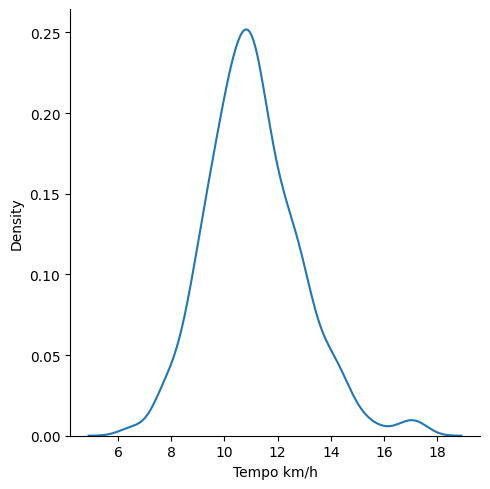

In [33]:
plot_speed = sns.displot(x='Tempo km/h', data=data, kind='kde')


data['Tempo km/h'].describe()

Możemy zauważyć, że najwięcej osób przebiegło półmaraton z średnim tempem ok. 11km/h. Co ciekawe zawodników biegnących z tempem ok. 17k/h było więcej niż tych biegnących 16km/h. Może to świadczyć o tym, że utworzyła się pewna grupa ucieczkowa, która odłączyła się od reszty. 

**podział danych ze względu na wiek**

mężczyźni

In [34]:
import plotly.graph_objects as go

# Przygotowanie danych
age_groups = ["M-20", "M-30", "M-40", "M-50", "M-60"]
colors = ['blue', 'orange', 'green', 'red', 'purple']

age_group_counts = {}
for group in age_groups:
    count = men_data.filter(pl.col("Kategoria") == group).height
    age_group_counts[group] = count

categories = list(age_group_counts.keys())
counts = list(age_group_counts.values())

# Tworzenie wykresu
fig = go.Figure()

fig.add_trace(go.Bar(
    x=categories,
    y=counts,
    marker=dict(color=colors),
   # text=counts,  # Wartości wyświetlane po najechani
    textposition='outside',  # Wartości na zewnątrz słupków
))

# Ustawienia osi i tytułów
fig.update_layout(
    width=1000,
    height=600,
    title="Liczba mężczyzn w zależności od kategorii wiekowej",
    xaxis_title="Kategoria wiekowa",
    yaxis_title="Liczba mężczyzn",
    template="plotly_white",
    xaxis_tickangle=-45  # Obrót etykiet na osi X
)

fig.show()


kobiety

In [35]:
# Kategorie wiekowe i kolory
age_groups = ["K-20", "K-30", "K-40", "K-50", "K-60"]
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Liczenie kobiet w każdej kategorii wiekowej
age_group_counts = {}
for group in age_groups:
    count = women_data.filter(pl.col("Kategoria") == group).height
    age_group_counts[group] = count

# Przygotowanie danych do wykresu
categories = list(age_group_counts.keys())
counts = list(age_group_counts.values())

# Tworzenie wykresu słupkowego
fig = go.Figure(data=[
    go.Bar(
        x=categories,
        y=counts,
        marker_color=colors,
        textposition='outside',
        hoverinfo='text',
        hovertext=[f"Kategoria: {cat}<br>Liczba kobiet: {cnt}" for cat, cnt in zip(categories, counts)]
    )
])

# Konfiguracja osi i tytułów
fig.update_layout(
    width=1000,
    height=600,
    title="Liczba Kobiet w zależności od kategorii wiekowej",
    xaxis=dict(title="Kategoria wiekowa"),
    yaxis=dict(title="Liczba Kobiet"),
    template="plotly_white"
)

# Wyświetlenie wykresu
fig.show()


Zarówno u mężczyzn jak i kobiet struktura wieku kształtuje się bardzo podobnie. Najwięcej osób znajdowało się w przedziale wiekowym od 30 do 50 lat. Ponad 21km przebiegło również 12 osób w wieku nie niższym niż 60 lat.

**zbadanie miejsca pochodzenia zawodników**

In [36]:
# Grupowanie danych i sortowanie
city_counts = data.group_by("Miejscowość").agg(
    pl.len().alias("Count")
).sort("Count", descending=True).head(10)

cities = city_counts["Miejscowość"].to_list()
counts = city_counts["Count"].to_list()

# Tworzenie wykresu
fig = go.Figure(data=[
    go.Bar(
        x=cities,
        y=counts,
        marker_color='blue',
        textposition='outside',
        hoverinfo='text',
        hovertext=[f"Miasto: {city}<br>Ilość wystąpień: {count}" for city, count in zip(cities, counts)]
    )
])

# Konfiguracja osi i tytułów
fig.update_layout(
    width=1000,
    height=800,
    title="10 najczęstszych miast",
    xaxis=dict(title="Miasto"),
    yaxis=dict(title="Ilość wystąpień"),
    template="plotly_white",
    xaxis_tickangle=-45
)

# Wyświetlenie wykresu
fig.show()


Najwięcej zawodników było oczywiście z Gliwic.

**udział procentowy osób zarejestrowany w klubach**

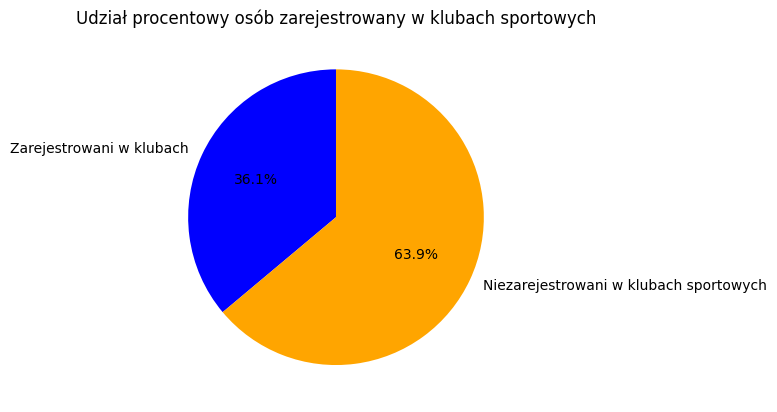

In [37]:
registered_in_clubs = data.filter(pl.col("Klub").is_not_null()).height
not_in_clubs = data.filter(pl.col("Klub").is_null()).height

labels = ['Zarejestrowani w klubach', 'Niezarejestrowani w klubach sportowych']
counts = [registered_in_clubs, not_in_clubs]
colors = ['blue', 'orange']

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Udział procentowy osób zarejestrowany w klubach sportowych')

plt.show()

Zarejestrowanych w klubach okazało się być aż 36% startujących w X Gliwickim Półmaratonie. Może to sugerować, że kluby stanowią ważne zaplecze treningowe i motywacyjne, które przyciąga do biegania coraz więcej osób. 